# PRCL-0019 ( Salesforce Effectiveness)

### Problem Statement
FicZon Inc is an IT solution provider with products ranging from onpremises
products to SAAS based solutions. FicZon major leads
generation channel is digital and through their website.FicZon business is majorly dependent on the sales force
effectiveness. As the market is maturing and more new competitors
entering the market, FicZon is experiencing the dip in sales.
Effective sales is dependent on lead quality and as of now, this is
based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the
lead categorization, it’s value is in for post analysis, rather than
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.

Our goal is: 
1. To explore the data for effective sales and
2. To train a machine learning model to predict the lead category(High Potential, Low Potential)

## Domain Analysis

This project focuses on predicting **lead quality** for **FicZon Inc.**, a company dealing with various sales leads from different sources and locations. The goal is to classify leads as **High Potential** or **Low Potential**, to help the sales team prioritize their efforts efficiently.

### Column Descriptions

| Column Name      | Description |
|------------------|-------------|
| **Created**      | The date when the lead was generated. |
| **Product_ID**   | The ID of the product the lead is interested in. Certain products may have higher conversion potential. |
| **Source**       | Indicates how the lead was generated. |
| **Sales_Agent**  | The sales representative assigned to handle the lead. |
| **Location**     | Geographical location of the lead. |
| **Delivery_Mode**| The preferred mode of delivery.  |
| **Status**       | Current status of the lead (e.g., Open, Potential, Junk Lead, Converted) |


In [1]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing mysql
import mysql.connector

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import *

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing XGBClassifier model
from xgboost import XGBClassifier

# Importing MLPClassifier model from sklearn
from sklearn.neural_network import MLPClassifier

# Importing naive_bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Importing SMOTE from imblearn
from imblearn.over_sampling import SMOTE

### Extracting Dataset from the given inputs 

In [2]:
# import pymysql
# import pandas as pd

# # Establish connection
# connection = pymysql.connect(
#     host='18.***.157.***',
#     port=****,
#     user='d*_tea**',
#     password='*********',
#     database='project_sales'
# )

# # SQL query
# query = "SELECT * FROM data"

# # Load data into DataFrame
# df = pd.read_sql(query, connection)

# # Close connection
# connection.close()

# # Display first few rows
# df.head()


### Saving the dataframe as csv file

In [3]:
# df.to_csv("project_sales_data.csv", index=False)

# Importing Data

In [4]:
data = pd.read_csv("project_sales_data.csv")
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Check for Duplicates 

In [5]:
data.duplicated().sum()

2

In [6]:
data.loc[data.duplicated()]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
130,10-11-2018 20:27,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
135,10-11-2018 20:17,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

# Basic Checks

In [9]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [10]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [11]:
data.shape

(7420, 9)

In [12]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7420 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7420 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7403 non-null   object 
 3   Mobile         5610 non-null   object 
 4   EMAIL          7420 non-null   object 
 5   Sales_Agent    7397 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7420 non-null   object 
 8   Status         7420 non-null   object 
dtypes: float64(1), object(8)
memory usage: 579.7+ KB


In [14]:
data[data['Product_ID']==9.0]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential
33,13-11-2018 14:11,9.0,By Recommendation,974XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-4,Potential
34,13-11-2018 13:53,9.0,Call,974XXXXXXX,#VALUE!,Sales-Agent-4,Bangalore,Mode-1,Potential
35,13-11-2018 13:52,9.0,Website,900XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Potential
40,13-11-2018 12:26,9.0,Call,992XXXXXXX,gXXXXXXXologies.in,Sales-Agent-4,Chennai,Mode-5,Potential
...,...,...,...,...,...,...,...,...,...
7366,30-04-2018 11:10,9.0,Live Chat-Google Organic,NaN,kXXXXXXX@gmail.com,Sales-Agent-7,Chennai,Mode-1,CONVERTED
7378,30-04-2018 09:25,9.0,Live Chat-Google Organic,NaN,nXXXXXXX@yahoo.com,Sales-Agent-7,Other Locations,Mode-1,In Progress Negative
7397,28-04-2018 16:11,9.0,Call,NaN,vXXXXXXX@gmail.com,Sales-Agent-6,Delhi,Mode-1,LOST
7402,28-04-2018 14:46,9.0,Live Chat-Direct,NaN,rXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-1,CONVERTED


In [15]:
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

In [16]:
for col in data.columns:
    print(f"--- {col} ---")
    print(data[col].unique())
    print(f"Unique Count: {data[col].nunique(dropna=False)}")
    print("\n")


--- Created ---
['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21' ...
 '28-04-2018 09:20' '28-04-2018 08:04' '28-04-2018 07:54']
Unique Count: 6752


--- Product_ID ---
[nan  9. 19. 18. 15. 27.  5.  2.  3. 25. 10. 20. 11. 21.  1. 12. 13. 17.
 24. 26. 16. 23. 22.  8. 14.  6.  0. 28.  7.  4.]
Unique Count: 30


--- Source ---
['Website' nan 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
Unique Count: 26


--- Mobile ---
['984XXXXXXX' 'XXXXXXX' '078XXXXXXX' '467XXXXXXX' '971XXXXXXX'
 '701XXXXXXX' '04.XXXXXXX' '805XXXXXXX' '+96XXXXXXX' '790XXXXXXX'
 '970XXXXXXX' '740XXXXXXX' '994XXXXXXX' '+49XXXXXXX' '962XXXXX

In [17]:
data.drop(['EMAIL', 'Mobile'], axis=1, inplace=True)

In [18]:
for col in data.columns:
    print(f"--- {col} ---")
    print(data[col].unique())
    print(f"Unique Count: {data[col].nunique(dropna=False)}")
    print("\n")


--- Created ---
['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21' ...
 '28-04-2018 09:20' '28-04-2018 08:04' '28-04-2018 07:54']
Unique Count: 6752


--- Product_ID ---
[nan  9. 19. 18. 15. 27.  5.  2.  3. 25. 10. 20. 11. 21.  1. 12. 13. 17.
 24. 26. 16. 23. 22.  8. 14.  6.  0. 28.  7.  4.]
Unique Count: 30


--- Source ---
['Website' nan 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
Unique Count: 26


--- Sales_Agent ---
['Sales-Agent-11' 'Sales-Agent-10' 'Sales-Agent-3' 'Sales-Agent-4'
 'Sales-Agent-9' 'Sales-Agent-7' nan 'Sales-Agent-8' 'Sales-Agent-5'
 'Sales-Agent-2' 'Sales-Agent-12' 'Sales-Agent-1' 

In [19]:
data.isnull().sum()

Created           0
Product_ID       56
Source           17
Sales_Agent      23
Location         56
Delivery_Mode     0
Status            0
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,13-11-2018 18:48,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,13-11-2018 17:09,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,13-11-2018 16:49,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,13-11-2018 16:37,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Exploratory Data Analysis

In [22]:
# from ydata_profiling import ProfileReport
# report=ProfileReport(data,title='EDA',explorative=False)
# report

In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data['Created'] = pd.to_datetime(data['Created'], format='%d-%m-%Y %H:%M')
data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,2018-11-13 18:51:00,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


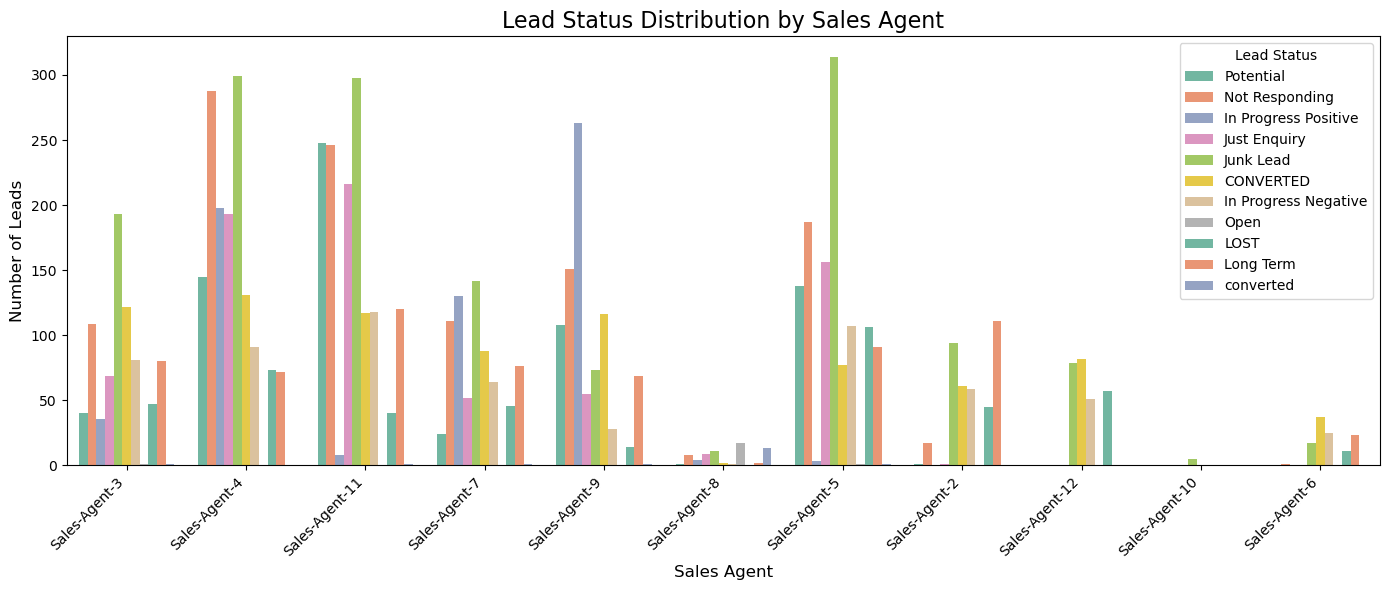

In [25]:
%matplotlib inline
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Sales_Agent', hue='Status', palette='Set2')

plt.title('Lead Status Distribution by Sales Agent', fontsize=16)
plt.xlabel('Sales Agent', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lead Status')
plt.tight_layout()
plt.show()




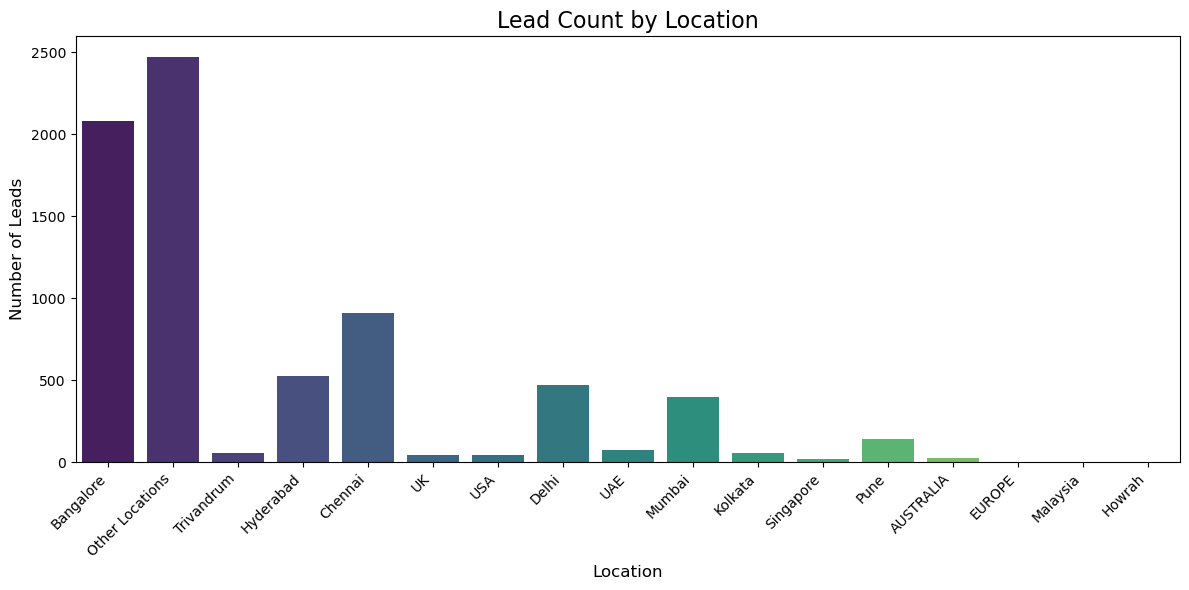

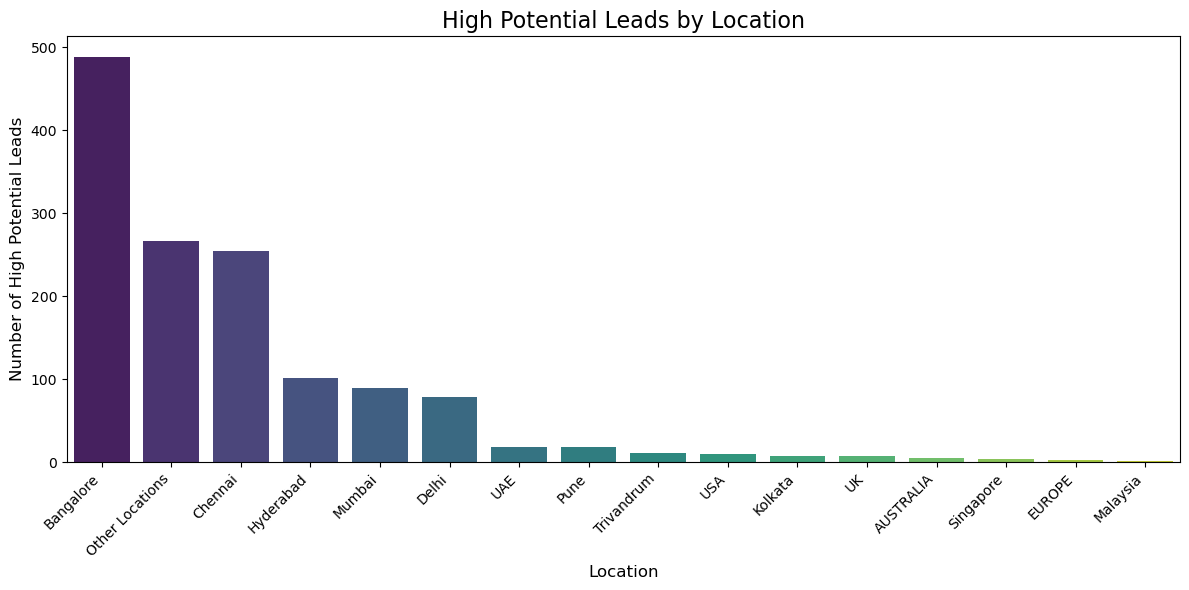

In [26]:
filtered_df = data.dropna(subset=['Location'])

# Lead Count by Location
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Location', palette='viridis')
plt.title('Lead Count by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# High Potential Leads by Location
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data[data['Status'].isin(['Open', 'Potential', 'In Progress Positive'])],
    x='Location',
    order=data[data['Status'].isin(['Open', 'Potential', 'In Progress Positive'])]['Location'].value_counts().index,
    palette='viridis'
)
plt.title('High Potential Leads by Location', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of High Potential Leads', fontsize=12)
plt.tight_layout()
plt.show()


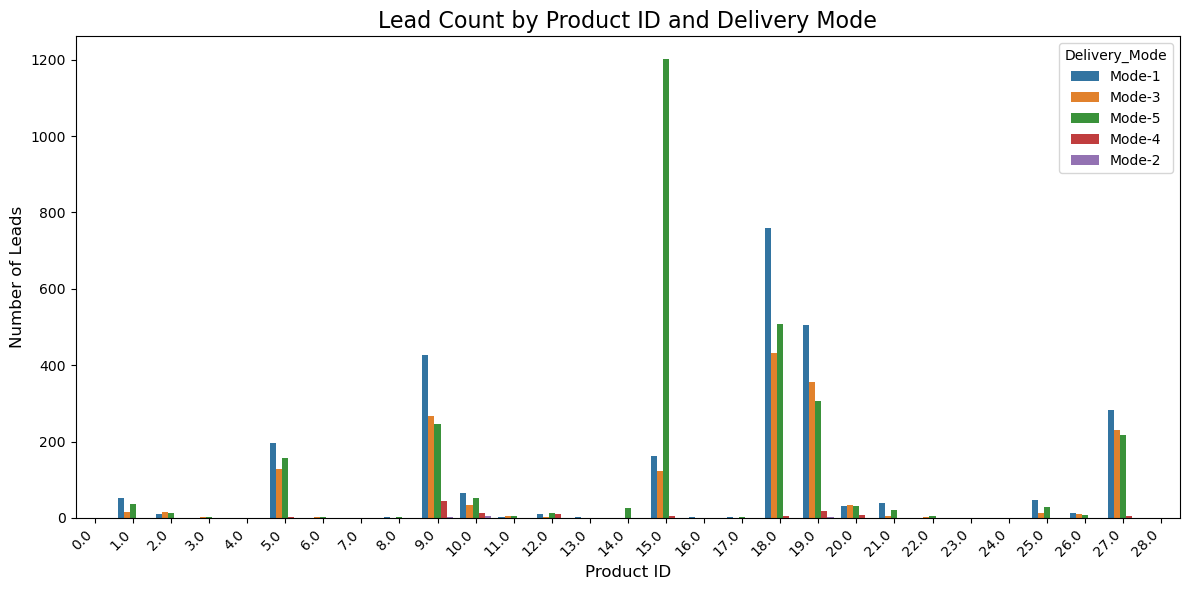

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Product_ID', hue='Delivery_Mode')

plt.title('Lead Count by Product ID and Delivery Mode', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##  Insights from EDA for FicZon Inc. – Improving Lead Quality and Sales

### 1. Sales Agent Observation
- Sales Agents **3, 4, 5, 7, and 11** have a higher number of **"Junk Leads"** compared to other types of leads they handle.  
- This suggests these agents may need better training or support to improve lead quality.

### 2. Location-Based Opportunity
- **Bangalore** stands out with the highest number of total leads and the most **High Potential Leads**.  
- This indicates that Bangalore is a key region and could be targeted more for better sales results.

### 3. Product and Delivery Preference
- Most leads prefer **Product ID 15.0**, and choose **Delivery Mode 5** most often.  
- This shows these options are popular and should be given more focus in sales strategies and delivery planning.


# DATA PREPROCESSING

### Creating Target Column

In [28]:

high_potential_status = ['Open', 'Potential', 'In Progress Positive','Long Term', 'converted', 'CONVERTED']
low_potential_status = ['Not Responding', 'Just Enquiry', 'Junk Lead', 'In Progress Negative', 'LOST']

data['Lead_Category'] = data['Status'].apply(
    lambda x:1 if x in high_potential_status else (0 if x in low_potential_status else 'Unknown')
)


In [29]:
data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Lead_Category
18,2018-11-13 18:51:00,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,1
19,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,1
24,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,1
25,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,0
26,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,1
...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,0
7418,2018-04-28 09:43:00,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,0
7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding,0
7420,2018-04-28 08:04:00,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,0


In [30]:
data['Lead_Category'].value_counts()

Lead_Category
0    4458
1    2861
Name: count, dtype: int64

In [31]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status', 'Lead_Category'],
      dtype='object')

### Encoding

In [32]:
le = LabelEncoder()
categorical_cols = ['Source', 'Sales_Agent', 'Location', 'Delivery_Mode']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [33]:
data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Lead_Category
18,2018-11-13 18:51:00,9.0,16,4,1,0,Potential,1
19,2018-11-13 18:48:00,19.0,2,5,10,4,Potential,1
24,2018-11-13 17:09:00,18.0,24,1,13,0,Potential,1
25,2018-11-13 16:49:00,15.0,24,8,6,0,Not Responding,0
26,2018-11-13 16:37:00,18.0,2,8,1,0,In Progress Positive,1
...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,2,7,9,3,LOST,0
7418,2018-04-28 09:43:00,15.0,2,2,10,4,LOST,0
7419,2018-04-28 09:20:00,5.0,14,1,1,0,Not Responding,0
7420,2018-04-28 08:04:00,21.0,1,5,10,0,Just Enquiry,0


In [34]:
data.drop(columns=['Created','Status'],inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7319 entries, 18 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7319 non-null   float64
 1   Source         7319 non-null   int32  
 2   Sales_Agent    7319 non-null   int32  
 3   Location       7319 non-null   int32  
 4   Delivery_Mode  7319 non-null   int32  
 5   Lead_Category  7319 non-null   int64  
dtypes: float64(1), int32(4), int64(1)
memory usage: 285.9 KB


# DATA SPLITTING

In [36]:
x = data.drop(columns=['Lead_Category'])
y = data['Lead_Category']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
data['Lead_Category'].value_counts()

Lead_Category
0    4458
1    2861
Name: count, dtype: int64

#### SMOTE 

In [39]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 3585, 1: 2270})
After SMOTE: Counter({0: 3585, 1: 3585})


## Logistic Regression 

In [40]:
log_model = LogisticRegression()
log_model.fit(x_train_smote, y_train_smote)
log_pred = log_model.predict(x_test)
log_acc= accuracy_score(y_test, log_pred)
print("Accuracy Score:",log_acc)
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test,log_pred))

Accuracy Score: 0.6454918032786885
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       873
           1       0.55      0.66      0.60       591

    accuracy                           0.65      1464
   macro avg       0.64      0.65      0.64      1464
weighted avg       0.66      0.65      0.65      1464

[[554 319]
 [200 391]]


In [41]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

log_model = LogisticRegression(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(
    estimator=log_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy',
    verbose=1
)

random_search.fit(x_train_smote, y_train_smote)

best_log_model = random_search.best_estimator_

log_pred = best_log_model.predict(x_test)

log_acc = accuracy_score(y_test, log_pred)
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score:", log_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.1}
Accuracy Score: 0.644808743169399
Confusion Matrix:
 [[553 320]
 [200 391]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68       873
           1       0.55      0.66      0.60       591

    accuracy                           0.64      1464
   macro avg       0.64      0.65      0.64      1464
weighted avg       0.66      0.64      0.65      1464



## Random Forest Classifier

In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_smote, y_train_smote)

rf_pred = rf_model.predict(x_test)

rf_acc=accuracy_score(y_test, rf_pred)

print("Accuracy Score:", rf_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))



Accuracy Score: 0.6782786885245902
Confusion Matrix:
 [[606 267]
 [204 387]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       873
           1       0.59      0.65      0.62       591

    accuracy                           0.68      1464
   macro avg       0.67      0.67      0.67      1464
weighted avg       0.69      0.68      0.68      1464



In [43]:
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy',
    verbose=1
)

random_search.fit(x_train_smote, y_train_smote)

best_rf = random_search.best_estimator_

rf_pred = best_rf.predict(x_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score:", rf_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Accuracy Score: 0.6810109289617486
Confusion Matrix:
 [[615 258]
 [209 382]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       873
           1       0.60      0.65      0.62       591

    accuracy                           0.68      1464
   macro avg       0.67      0.68      0.67      1464
weighted avg       0.69      0.68      0.68      1464



## Decision Tree Classifier

In [44]:
model=DecisionTreeClassifier()

model.fit(x_train_smote,y_train_smote)

y_pred=model.predict(x_test)

print('The accuracy score is ',accuracy_score(y_test,y_pred))
 
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

The accuracy score is  0.6598360655737705
[[621 252]
 [246 345]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       873
           1       0.58      0.58      0.58       591

    accuracy                           0.66      1464
   macro avg       0.65      0.65      0.65      1464
weighted avg       0.66      0.66      0.66      1464



In [45]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search.fit(x_train_smote, y_train_smote)

best_dt = random_search.best_estimator_

dt_pred = best_dt.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)

print("Best Parameters:", random_search.best_params_)
print("Accuracy Score:", dt_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))


Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Accuracy Score: 0.657103825136612
Confusion Matrix:
 [[619 254]
 [248 343]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       873
           1       0.57      0.58      0.58       591

    accuracy                           0.66      1464
   macro avg       0.64      0.64      0.64      1464
weighted avg       0.66      0.66      0.66      1464



## K Nearest Neighbor Classifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_smote, y_train_smote)

knn_pred = knn_model.predict(x_test)

knn_acc = accuracy_score(y_test, knn_pred)
print("Accuracy Score:", knn_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

Accuracy Score: 0.6618852459016393
Confusion Matrix:
 [[591 282]
 [213 378]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.70       873
           1       0.57      0.64      0.60       591

    accuracy                           0.66      1464
   macro avg       0.65      0.66      0.65      1464
weighted avg       0.67      0.66      0.66      1464



In [47]:
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search.fit(x_train_smote, y_train_smote)

best_knn = random_search.best_estimator_

knn_pred = best_knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)

print("Best Parameters:", random_search.best_params_)
print("Accuracy Score:", knn_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))


Best Parameters: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}
Accuracy Score: 0.6646174863387978
Confusion Matrix:
 [[615 258]
 [233 358]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       873
           1       0.58      0.61      0.59       591

    accuracy                           0.66      1464
   macro avg       0.65      0.66      0.65      1464
weighted avg       0.67      0.66      0.67      1464



## XGB Classifier

In [48]:
le = LabelEncoder()
y_train_smote = le.fit_transform(y_train_smote)
y_test = le.transform(y_test)


In [49]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(x_train_smote, y_train_smote)

xgb_pred = xgb_model.predict(x_test)

xgb_acc = accuracy_score(y_test, xgb_pred)
print("Accuracy Score:", xgb_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


Accuracy Score: 0.703551912568306
Confusion Matrix:
 [[629 244]
 [190 401]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       873
           1       0.62      0.68      0.65       591

    accuracy                           0.70      1464
   macro avg       0.69      0.70      0.70      1464
weighted avg       0.71      0.70      0.71      1464



In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}
xgb = XGBClassifier(use_label_encoder=False)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_smote, y_train_smote)

best_xgb = random_search.best_estimator_

xgb_pred = best_xgb.predict(x_test)

xgb_acc = accuracy_score(y_test, xgb_pred)
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score:", xgb_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Accuracy Score: 0.7083333333333334
Confusion Matrix:
 [[630 243]
 [184 407]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       873
           1       0.63      0.69      0.66       591

    accuracy                           0.71      1464
   macro avg       0.70      0.71      0.70      1464
weighted avg       0.71      0.71      0.71      1464



In [51]:
comparison_dict = {'Model': ['LogisticRegression','RandomForest','XGB','KNN ','DecisionTree'],
                   'accuracy_score': [log_acc,rf_acc,xgb_acc,knn_acc,dt_acc]}

comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

             Model  accuracy_score
LogisticRegression        0.644809
      RandomForest        0.681011
               XGB        0.708333
              KNN         0.664617
      DecisionTree        0.657104


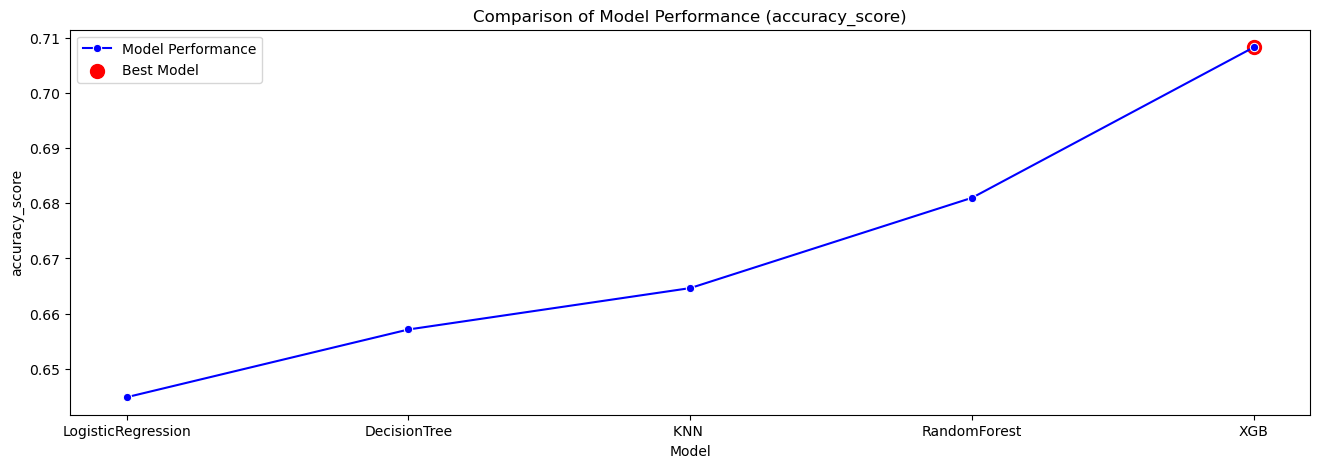

In [52]:
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

# Conclusion

- Among all the models tested, the **XGBoost Classifier** achieved the **highest accuracy score of 70.83%**, making it the most effective model for predicting lead quality.
- The **Random Forest** model also performed reasonably well with **68.10% accuracy**, followed by **K-Nearest Neighbors (66.46%)** and **Decision Tree (65.71%)**.
- **Logistic Regression**, while interpretable, showed the **lowest accuracy (64.48%)** among the models testocus.


Based on this comparison, **XGBoost** can be considered the most suitable model for FicZon Inc. to classify leads into *High Potential* and *Low Potential*, helping improve their sales strategy and focus.


## Challenges faced 
1. All the columns in the dataset are categorical or discrete in nature.
2. Identifying strong relationships between features and the target variable is challenging.
3. Hyperparameter tuning led to only marginal improvements in model performance.
